In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MIL_functions import data_analysis,molecule_analysis,data_encoding
from rdkit import Chem

In [2]:
## done to hide an unneccesary error
pd.options.mode.chained_assignment = None  # default='warn'

# Aromatic Amine data analysis

# MACCS KEYS

In [3]:
int_results_raw = {
    'SEC':      pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_SEC.pk1'),
    'LHS' :     pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_LSH.pk1'),
    'scaffold': pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_Scaffold.pk1'),
    'random':   pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_results.pk1'),
}
ext_results_raw = {
    'SEC':      pd.read_pickle('model_results\external\ext_val_results_SEC_stratified.pk1'),
    'LHS':      pd.read_pickle('model_results\external\ext_val_results_LSH_stratified.pk1'),
    'scaffold': pd.read_pickle('model_results\external\ext_val_results_scaffold_stratified.pk1'),
    'random':   pd.read_pickle('model_results\external\ext_val_results.pk1')
}
macro_results={}; micro_results={}; int_results={}; ext_results={}

for data in int_results_raw:
    print(data,'internal validation results read')
    int_results[data] = data_analysis.pickle_transform(int_results_raw[data])
    macro_results[data],micro_results[data] = data_analysis.macro_mirco_mean_stdv(int_results[data])
macro_results = data_analysis.get_AUROC(data_dict=int_results_raw, paste_dict=macro_results)
micro_results = data_analysis.get_AUROC(data_dict=int_results_raw, paste_dict=micro_results)

for data in ext_results_raw:
    print(data,'external validation results read')
    ext_results_raw[data]['model'] = ext_results_raw[data]['model'].apply(lambda x:x.replace('total_data_',''))
    ext_results[data] = data_analysis.pickle_transform(ext_results_raw[data])
    ext_results[data] = data_analysis.ext_val_metrics(ext_results[data])
ext_results = data_analysis.get_AUROC(data_dict=ext_results_raw, paste_dict=ext_results)

SEC
LHS
scaffold
random


### Raw Results

In [4]:
data_analysis.format_to_table(micro_results)

,encoding,Grouping,Kernel,model,sensitivity,specificity,accuracy,AUROC,F1,Cohen Kappa
0,MACCS,SEC,linear,MISVM,0.799347,0.602649,0.734426,0.78437,0.801308,0.400986
1,MACCS,SEC,linear,SIL,0.763907,0.792188,0.768852,0.80541,0.845055,0.409767
2,MACCS,SEC,linear,NSK,0.825169,0.679721,0.779508,0.81802,0.837003,0.496569
3,MACCS,SEC,linear,sbMIL,0.816954,0.419424,0.564208,0.67725,0.577259,0.200768
4,MACCS,SEC,linear,sMIL,0.680728,0.460274,0.658743,0.61925,0.782214,0.069068
5,MACCS,SEC,quadratic,MISVM,0.858153,0.699841,0.803825,0.82735,0.851775,0.561839
6,MACCS,SEC,quadratic,SIL,0.796853,0.754630,0.786885,0.82401,0.851031,0.482759
7,MACCS,SEC,quadratic,NSK,0.831967,0.663934,0.775956,0.77462,0.831967,0.495902
8,MACCS,SEC,quadratic,sbMIL,0.808591,0.441502,0.600273,0.70026,0.636341,0.234966
9,MACCS,SEC,quadratic,sMIL,0.702366,0.543233,0.679235,0.64913,0.789152,0.159828


In [5]:
micro_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.801308,0.440751,0.400986,0.734426,0.799347,0.602649,0.78437
1,MACCS,SIL_linear,0.845055,0.427844,0.409767,0.768852,0.763907,0.792188,0.80541
2,MACCS,NSK_linear,0.837003,0.524105,0.496569,0.779508,0.825169,0.679721,0.81802
3,MACCS,sbMIL-linear,0.577259,0.245899,0.200768,0.564208,0.816954,0.419424,0.67725
4,MACCS,sMIL_linear,0.782214,0.111273,0.069068,0.658743,0.680728,0.460274,0.61925
5,MACCS,MISVM_quadratic,0.851775,0.583274,0.561839,0.803825,0.858153,0.699841,0.82735
6,MACCS,SIL_quadratic,0.851031,0.504576,0.482759,0.786885,0.796853,0.754630,0.82401
7,MACCS,NSK_quadratic,0.831967,0.524137,0.495902,0.775956,0.831967,0.663934,0.77462
8,MACCS,sbMIL-quadratic,0.636341,0.285184,0.234966,0.600273,0.808591,0.441502,0.70026
9,MACCS,sMIL_quadratic,0.789152,0.204064,0.159828,0.679235,0.702366,0.543233,0.64913


In [6]:
micro_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.801308,0.440751,0.400986,0.734426,0.799347,0.602649,0.78437
1,MACCS,SIL_linear,0.845055,0.427844,0.409767,0.768852,0.763907,0.792188,0.80541
2,MACCS,NSK_linear,0.837003,0.524105,0.496569,0.779508,0.825169,0.679721,0.81802
3,MACCS,sbMIL-linear,0.577259,0.245899,0.200768,0.564208,0.816954,0.419424,0.67725
4,MACCS,sMIL_linear,0.782214,0.111273,0.069068,0.658743,0.680728,0.460274,0.61925
5,MACCS,MISVM_quadratic,0.851775,0.583274,0.561839,0.803825,0.858153,0.699841,0.82735
6,MACCS,SIL_quadratic,0.851031,0.504576,0.482759,0.786885,0.796853,0.754630,0.82401
7,MACCS,NSK_quadratic,0.831967,0.524137,0.495902,0.775956,0.831967,0.663934,0.77462
8,MACCS,sbMIL-quadratic,0.636341,0.285184,0.234966,0.600273,0.808591,0.441502,0.70026
9,MACCS,sMIL_quadratic,0.789152,0.204064,0.159828,0.679235,0.702366,0.543233,0.64913


In [7]:
micro_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.696506,0.359457,0.318524,0.653552,0.837169,0.487513,0.76867
1,MACCS,SIL_linear,0.842202,0.421109,0.401392,0.765027,0.762458,0.776923,0.81839
2,MACCS,NSK_linear,0.848726,0.542676,0.518581,0.792350,0.825077,0.713755,0.82345
3,MACCS,sbMIL-linear,0.530442,0.217956,0.177835,0.538525,0.824546,0.406312,0.69409
4,MACCS,sMIL_linear,0.787238,0.155535,0.114020,0.670219,0.690690,0.515222,0.64399
5,MACCS,MISVM_quadratic,0.856493,0.597136,0.577173,0.810383,0.864357,0.708070,0.84832
6,MACCS,SIL_quadratic,0.857418,0.534468,0.514223,0.797814,0.809091,0.763736,0.83772
7,MACCS,NSK_quadratic,0.836459,0.521037,0.493231,0.778415,0.823343,0.679229,0.79488
8,MACCS,sbMIL-quadratic,0.723315,0.392228,0.353863,0.677049,0.843341,0.510394,0.75454
9,MACCS,sMIL_quadratic,0.805894,0.285547,0.249120,0.708470,0.724567,0.626866,0.69961


In [8]:
micro_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.454130,0.191291,0.170705,0.510656,0.885850,0.398723,0.76702
1,MACCS,SIL_linear,0.838988,0.442211,0.417627,0.765301,0.773057,0.735948,0.79077
2,MACCS,NSK_linear,0.852519,0.568422,0.545983,0.800820,0.841790,0.712187,0.82430
3,MACCS,sbMIL-linear,0.544190,0.171586,0.097295,0.516667,0.732824,0.376296,0.62713
4,MACCS,sMIL_linear,0.784656,0.119937,0.079503,0.662568,0.682853,0.479452,0.64137
5,MACCS,MISVM_quadratic,0.864177,0.611911,0.593533,0.819126,0.865242,0.727569,0.83383
6,MACCS,SIL_quadratic,0.865533,0.562241,0.544503,0.809836,0.818713,0.783550,0.83397
7,MACCS,NSK_quadratic,0.837133,0.539938,0.513596,0.783333,0.839028,0.673436,0.79155
8,MACCS,sbMIL-quadratic,0.718915,0.367750,0.321686,0.665847,0.818420,0.499142,0.72922
9,MACCS,sMIL_quadratic,0.802610,0.267704,0.230026,0.702459,0.719532,0.612350,0.66292


In [9]:
micro_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.322388,0.111688,0.090477,0.440274,0.845217,0.364553,0.72278
1,MACCS,SIL_linear,0.829205,0.385219,0.357955,0.746849,0.755219,0.710294,0.79108
2,MACCS,NSK_linear,0.836510,0.513224,0.484950,0.776712,0.819253,0.678733,0.79471
3,MACCS,sbMIL-linear,0.566169,0.233361,0.186684,0.554521,0.811162,0.411187,0.65993
4,MACCS,sMIL_linear,0.790359,0.118341,0.083290,0.668767,0.685002,0.501548,0.61333
5,MACCS,MISVM_quadratic,0.844931,0.562965,0.539327,0.794247,0.851436,0.684042,0.80796
6,MACCS,SIL_quadratic,0.844951,0.495741,0.470664,0.780000,0.798832,0.723381,0.80054
7,MACCS,NSK_quadratic,0.805964,0.449129,0.410802,0.739726,0.803339,0.608878,0.73856
8,MACCS,sbMIL-quadratic,0.685580,0.318501,0.265205,0.632603,0.801096,0.464110,0.69570
9,MACCS,sMIL_quadratic,0.792842,0.223796,0.180280,0.686027,0.709250,0.557348,0.65294


In [10]:
ext_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.705882,0.345863,0.302326,0.651163,0.837209,0.465116,0.78562
1,MACCS,NSK_polynomial,0.803030,0.336716,0.293731,0.714286,0.746479,0.600000,0.60710
2,MACCS,TPOT,0.779661,0.418340,0.374736,0.714286,0.807018,0.558824,0.71749


In [11]:
ext_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.796748,0.339061,0.289491,0.709302,0.765625,0.545455,0.61896
1,MACCS,NSK_polynomial,0.721311,0.233607,0.154645,0.626374,0.721311,0.433333,0.54098
2,MACCS,TPOT,0.793651,0.377545,0.330882,0.714286,0.769231,0.576923,0.74836


In [12]:
ext_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.684685,0.203519,0.117302,0.593023,0.730769,0.382353,0.55712
1,MACCS,NSK_polynomial,0.596491,0.060133,-0.071136,0.494505,0.641509,0.289474,0.38306
2,MACCS,TPOT,0.585366,-0.099752,-0.278865,0.439560,0.580645,0.137931,0.51448


In [13]:
ext_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.875000,0.548616,0.530047,0.816092,0.835821,0.750000,0.81274
1,MACCS,NSK_polynomial,0.866142,0.587555,0.569383,0.815217,0.833333,0.769231,0.76335
2,MACCS,TPOT,0.920635,0.754506,0.748771,0.891304,0.892308,0.888889,0.89080


### Results graphics

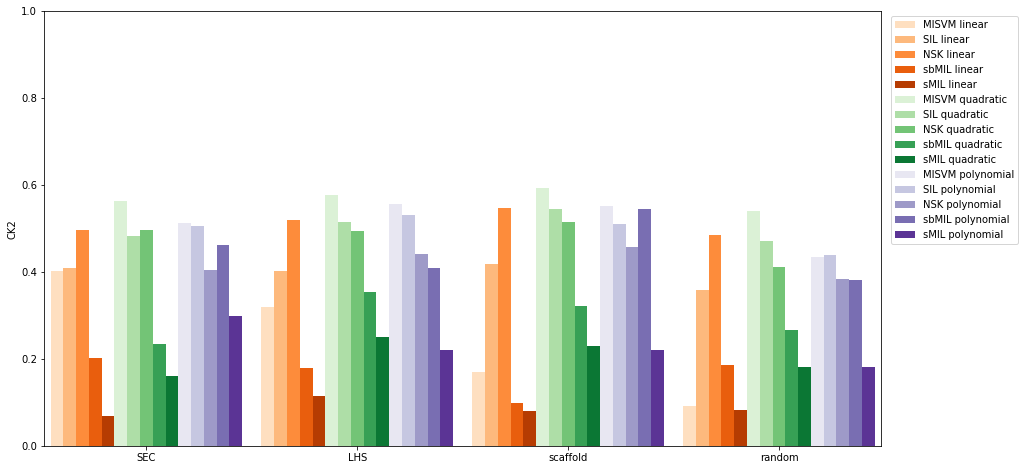

In [14]:
data_analysis.my_grouped_bar(micro_results,metric='CK2')

### Internal Validation

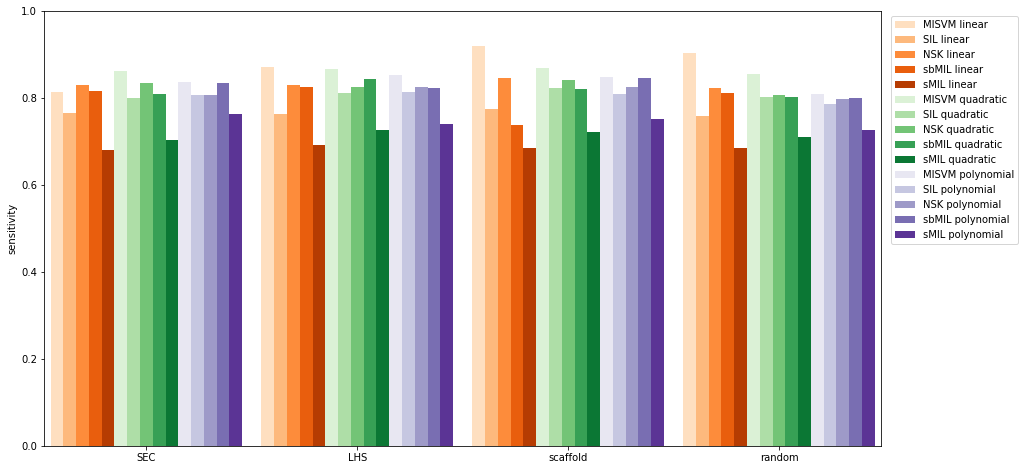

In [15]:
data_analysis.my_grouped_bar(macro_results,metric='sensitivity')

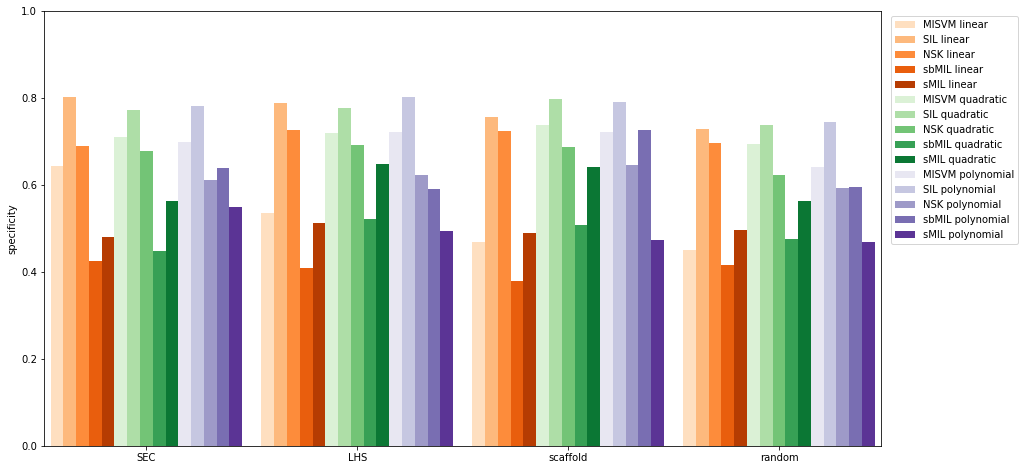

In [16]:
data_analysis.my_grouped_bar(macro_results,metric='specificity')

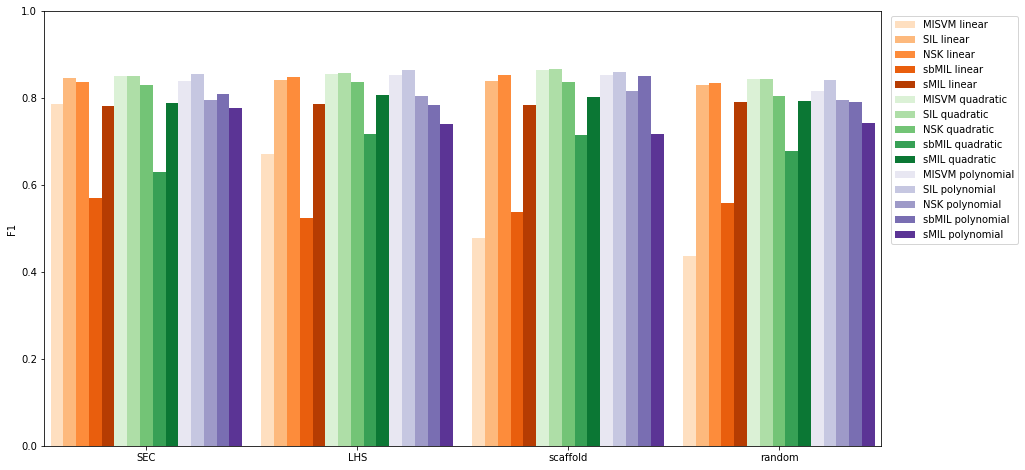

In [17]:
data_analysis.my_grouped_bar(macro_results,metric='F1')

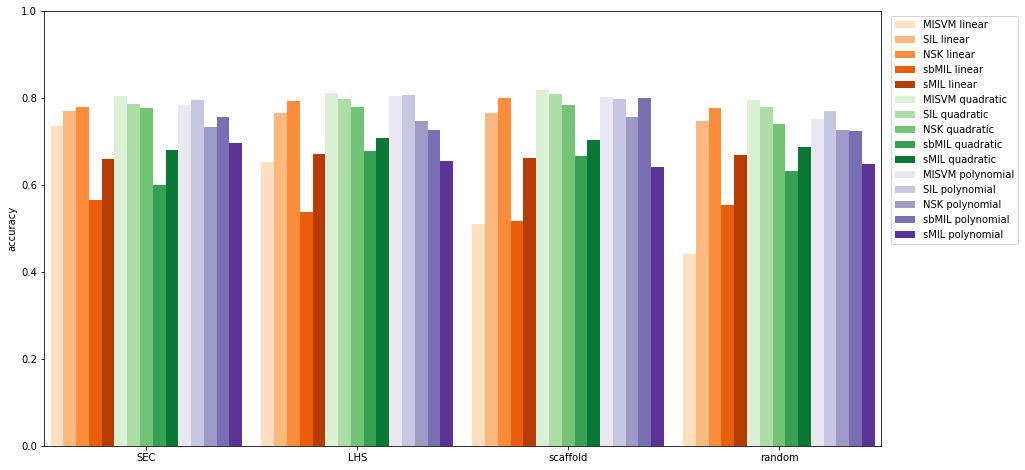

In [18]:
data_analysis.my_grouped_bar(micro_results,metric='accuracy')

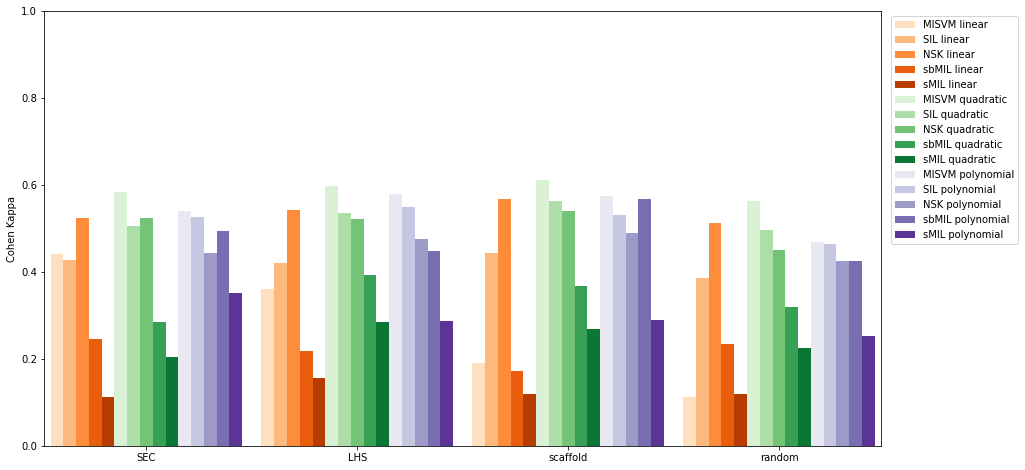

In [19]:
data_analysis.my_grouped_bar(micro_results,metric='Cohen Kappa')

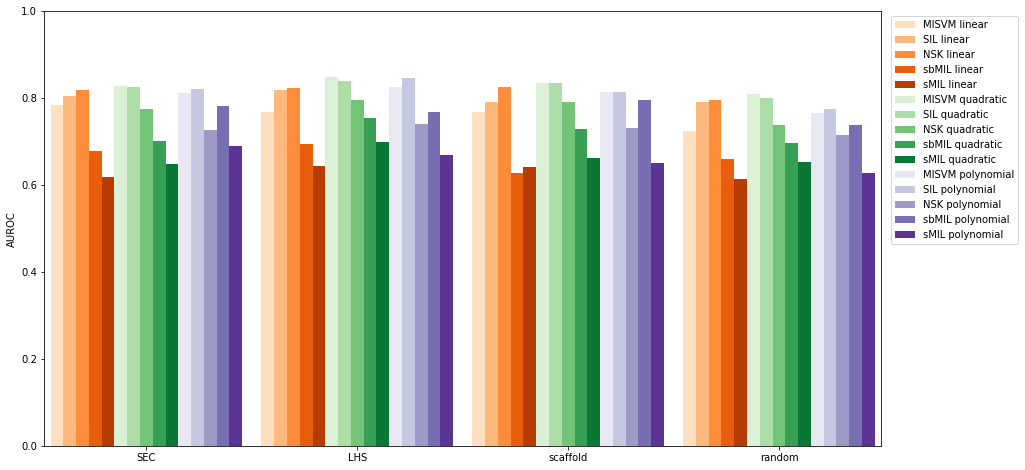

In [20]:
data_analysis.my_grouped_bar(micro_results,metric='AUROC')

# Morgan

### Reading results

In [21]:
MORGAN_int_results_raw = {
    'SEC':      pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_SEC_MORGAN.pk1'),
    'LHS' :     pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_LSH_MORGAN.pk1'),
    'scaffold': pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_Scaffold_MORGAN.pk1'),
    'random':   pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_results_MORGAN.pk1'),
}
MORGAN_ext_results_raw = {
    'SEC':      pd.read_pickle('model_results\external\ext_val_results_SEC_stratified_MORGAN.pk1'),
    'LHS':      pd.read_pickle('model_results\external\ext_val_results_LSH_stratified_MORGAN.pk1'),
    'scaffold': pd.read_pickle('model_results\external\ext_val_results_scaffold_stratified_MORGAN.pk1'),
    'random':   pd.read_pickle('model_results\external\ext_val_results_MORGAN.pk1')
}
MORGAN_macro_results={}; MORGAN_micro_results={}; MORGAN_int_results={}; MORGAN_ext_results={}

for data in MORGAN_int_results_raw:
    MORGAN_int_results[data] = data_analysis.pickle_transform(MORGAN_int_results_raw[data])
    MORGAN_macro_results[data],MORGAN_micro_results[data] = data_analysis.macro_mirco_mean_stdv(MORGAN_int_results[data])
MORGAN_macro_results = data_analysis.get_AUROC(data_dict=MORGAN_int_results_raw, paste_dict=MORGAN_macro_results)
MORGAN_micro_results = data_analysis.get_AUROC(data_dict=MORGAN_int_results_raw, paste_dict=MORGAN_micro_results)

for data in MORGAN_ext_results_raw:
    MORGAN_ext_results_raw[data]['model'] = MORGAN_ext_results_raw[data]['model'].apply(lambda x:x.replace('total_data_',''))
    MORGAN_ext_results[data] = data_analysis.pickle_transform(MORGAN_ext_results_raw[data])
    MORGAN_ext_results[data] = data_analysis.ext_val_metrics(MORGAN_ext_results[data])
MORGAN_ext_results = data_analysis.get_AUROC(data_dict=MORGAN_ext_results_raw, paste_dict=MORGAN_ext_results)

### Raw results

In [22]:
data_analysis.format_to_table(MORGAN_micro_results)

,encoding,Grouping,Kernel,model,sensitivity,specificity,accuracy,AUROC,F1,Cohen Kappa
0,Morgan,SEC,linear,MISVM,0.930233,0.336467,0.343443,0.80158,0.032219,0.009345
1,Morgan,SEC,linear,SIL,0.746811,0.812977,0.756284,0.83938,0.840029,0.360421
2,Morgan,SEC,linear,NSK,0.814760,0.740020,0.794809,0.85461,0.853406,0.514126
3,Morgan,SEC,linear,sbMIL,0.877717,0.424491,0.561202,0.65665,0.546840,0.224903
4,Morgan,SEC,linear,sMIL,0.741660,0.543659,0.689617,0.67087,0.778902,0.262657
5,Morgan,SEC,quadratic,MISVM,0.871571,0.726475,0.821858,0.87977,0.865456,0.601954
6,Morgan,SEC,quadratic,SIL,0.797861,0.833114,0.805191,0.87483,0.866454,0.516173
7,Morgan,SEC,quadratic,NSK,0.841276,0.698480,0.795082,0.82430,0.847437,0.535508
8,Morgan,SEC,quadratic,sbMIL,0.857143,0.469541,0.631148,0.76458,0.659607,0.301001
9,Morgan,SEC,quadratic,sMIL,0.830963,0.497271,0.663934,0.68288,0.711809,0.328114


In [23]:
MORGAN_micro_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.032219,0.010156,0.009345,0.343443,0.930233,0.336467,0.80158
1,Morgan,SIL_linear,0.840029,0.375665,0.360421,0.756284,0.746811,0.812977,0.83938
2,Morgan,NSK_linear,0.853406,0.536440,0.514126,0.794809,0.814760,0.740020,0.85461
3,Morgan,sbMIL-linear,0.546840,0.251090,0.224903,0.561202,0.877717,0.424491,0.65665
4,Morgan,sMIL_linear,0.778902,0.316920,0.262657,0.689617,0.741660,0.543659,0.67087
5,Morgan,MISVM_quadratic,0.865456,0.619633,0.601954,0.821858,0.871571,0.726475,0.87977
6,Morgan,SIL_quadratic,0.866454,0.529971,0.516173,0.805191,0.797861,0.833114,0.87483
7,Morgan,NSK_quadratic,0.847437,0.559249,0.535508,0.795082,0.841276,0.698480,0.82430
8,Morgan,sbMIL-quadratic,0.659607,0.335912,0.301001,0.631148,0.857143,0.469541,0.76458
9,Morgan,sMIL_quadratic,0.711809,0.370588,0.328114,0.663934,0.830963,0.497271,0.68288


In [24]:
MORGAN_micro_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.183166,0.066824,0.064279,0.398087,0.961089,0.355569,0.82407
1,Morgan,SIL_linear,0.844149,0.394196,0.380272,0.763115,0.751841,0.828678,0.85318
2,Morgan,NSK_linear,0.866167,0.585238,0.566681,0.814754,0.835491,0.762089,0.86754
3,Morgan,sbMIL-linear,0.555998,0.268477,0.249279,0.573224,0.907236,0.433772,0.70731
4,Morgan,sMIL_linear,0.756246,0.357696,0.302982,0.682787,0.775291,0.522064,0.68810
5,Morgan,MISVM_quadratic,0.871721,0.637266,0.621264,0.830328,0.878800,0.737887,0.88933
6,Morgan,SIL_quadratic,0.871909,0.538748,0.528190,0.811749,0.797890,0.868239,0.89153
7,Morgan,NSK_quadratic,0.866707,0.614957,0.596997,0.821585,0.863359,0.736053,0.83775
8,Morgan,sbMIL-quadratic,0.660960,0.358808,0.335986,0.642896,0.900353,0.480624,0.77920
9,Morgan,sMIL_quadratic,0.718095,0.395775,0.361151,0.676503,0.856818,0.509474,0.73225


In [25]:
MORGAN_micro_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.83466
1,Morgan,SIL_linear,0.846360,0.393287,0.381866,0.765301,0.750873,0.854617,0.86757
2,Morgan,NSK_linear,0.863655,0.596917,0.577676,0.815301,0.850278,0.738179,0.86842
3,Morgan,sbMIL-linear,0.515665,0.223785,0.195192,0.539617,0.863330,0.411293,0.65710
4,Morgan,sMIL_linear,0.772820,0.368583,0.316783,0.696721,0.771872,0.545305,0.68328
5,Morgan,MISVM_quadratic,0.881587,0.664283,0.650681,0.843443,0.889120,0.756542,0.89588
6,Morgan,SIL_quadratic,0.871415,0.562302,0.548165,0.815027,0.812035,0.825150,0.88381
7,Morgan,NSK_quadratic,0.863967,0.620232,0.602629,0.821038,0.875789,0.719844,0.83786
8,Morgan,sbMIL-quadratic,0.672405,0.360394,0.331842,0.646448,0.879470,0.482791,0.77764
9,Morgan,sMIL_quadratic,0.631441,0.321615,0.293821,0.616940,0.880499,0.460366,0.67313


In [26]:
MORGAN_micro_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.000000,0.000000,0.000000,0.331507,0.000000,0.331507,0.75059
1,Morgan,SIL_linear,0.824720,0.297338,0.276752,0.729589,0.727672,0.742919,0.82212
2,Morgan,NSK_linear,0.839746,0.510556,0.483099,0.778630,0.813605,0.691794,0.83039
3,Morgan,sbMIL-linear,0.479882,0.199133,0.172017,0.518356,0.862766,0.398893,0.64016
4,Morgan,sMIL_linear,0.759458,0.293311,0.230525,0.669041,0.738575,0.500936,0.64666
5,Morgan,MISVM_quadratic,0.842459,0.569253,0.546452,0.794247,0.862914,0.673469,0.84823
6,Morgan,SIL_quadratic,0.851246,0.466768,0.448251,0.780822,0.779101,0.787921,0.85676
7,Morgan,NSK_quadratic,0.838563,0.545855,0.520212,0.785753,0.844842,0.671750,0.81326
8,Morgan,sbMIL-quadratic,0.662989,0.335481,0.299396,0.631781,0.854005,0.468126,0.74521
9,Morgan,sMIL_quadratic,0.652626,0.287556,0.232684,0.606849,0.797161,0.442573,0.64748


In [27]:
MORGAN_ext_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.897638,0.672753,0.662482,0.857143,0.863636,0.840000,0.84590
1,Morgan,NSK_polynomial,0.859504,0.600379,0.580872,0.813187,0.866667,0.709677,0.81038
2,Morgan,TPOT,0.870229,0.557823,0.542443,0.813187,0.814286,0.809524,0.55546


In [28]:
MORGAN_ext_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.790698,0.335754,0.286378,0.703297,0.75,0.565217,0.72869
1,Morgan,NSK_polynomial,0.758621,0.386115,0.337493,0.692308,0.80,0.527778,0.68033
2,Morgan,TPOT,0.825397,0.466912,0.433824,0.758242,0.80,0.653846,0.67842


In [29]:
MORGAN_ext_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.705882,0.232347,0.151346,0.615385,0.724138,0.424242,0.61284
1,Morgan,NSK_polynomial,0.650407,0.049049,-0.078258,0.527473,0.645161,0.275862,0.50437
2,Morgan,TPOT,0.693548,0.138966,0.038911,0.582418,0.682540,0.357143,0.61011


In [30]:
MORGAN_ext_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.928000,0.780607,0.775731,0.902174,0.906250,0.892857,0.88842
1,Morgan,NSK_polynomial,0.903226,0.712789,0.703385,0.869565,0.888889,0.827586,0.86013
2,Morgan,TPOT,0.935484,0.806287,0.802257,0.913043,0.920635,0.896552,0.88260


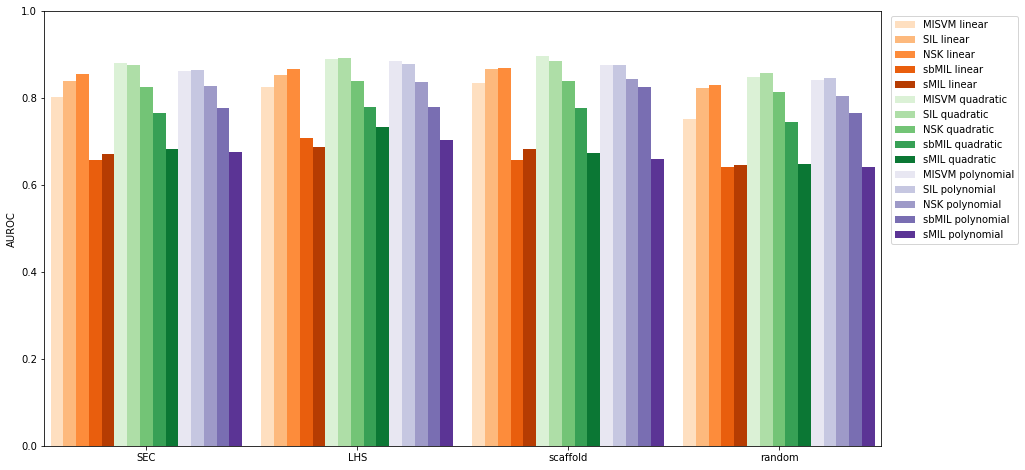

In [31]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='AUROC')

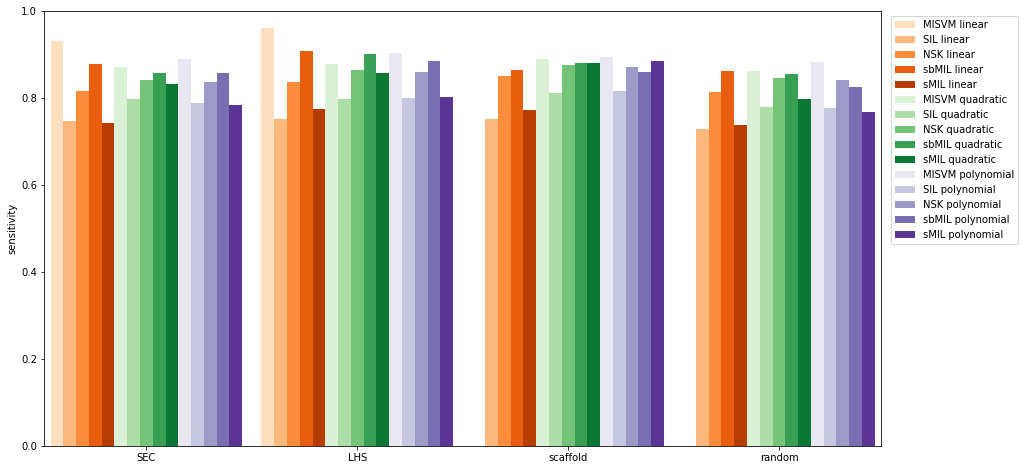

In [32]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='sensitivity')

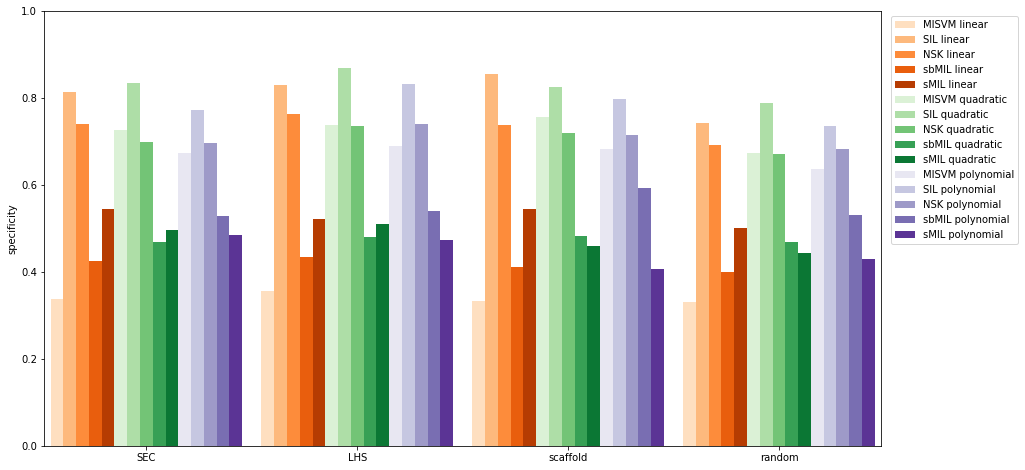

In [33]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='specificity')

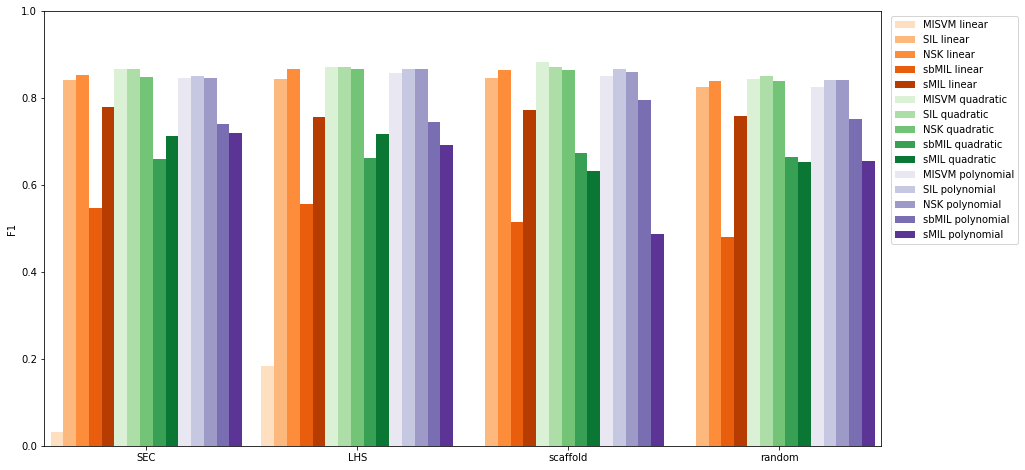

In [34]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='F1')

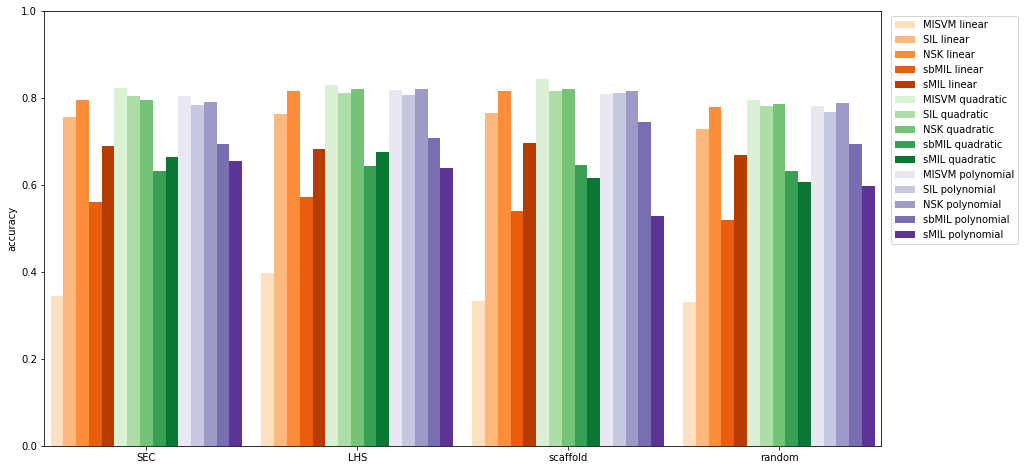

In [35]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='accuracy')

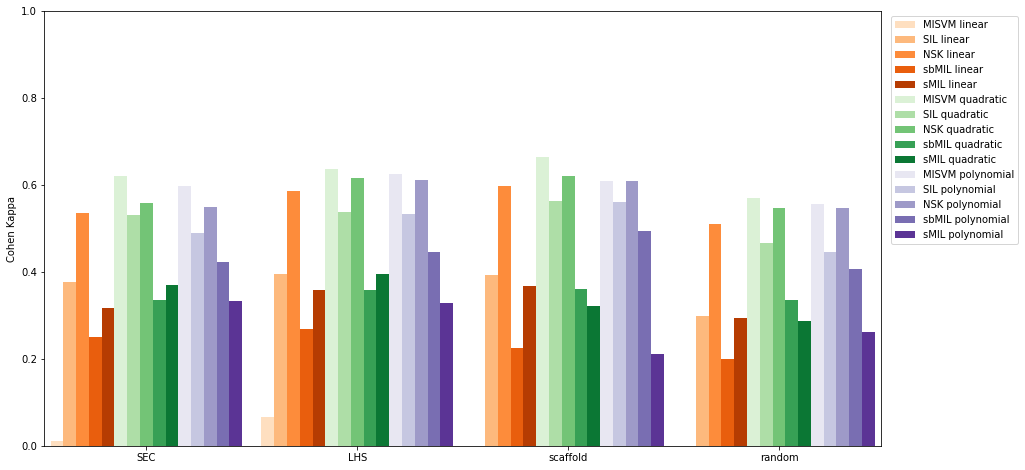

In [36]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='Cohen Kappa')

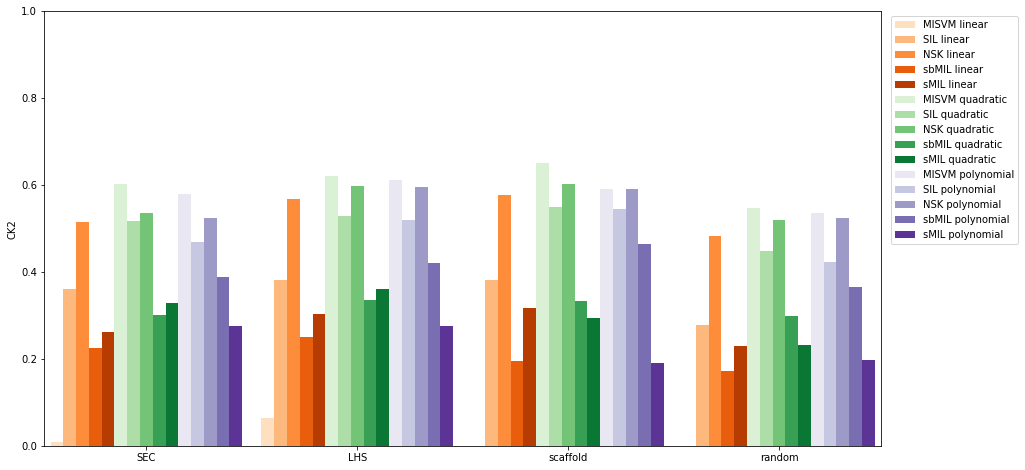

In [37]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='CK2')

### External Validation

Bar chart

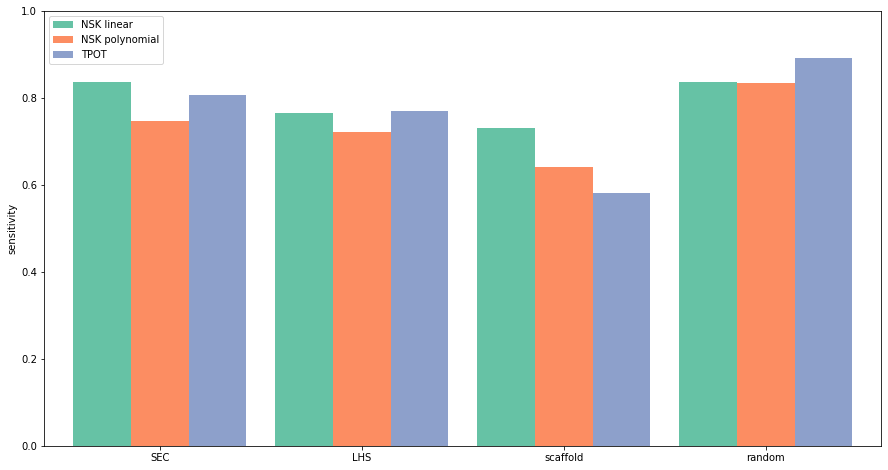

In [38]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='sensitivity')

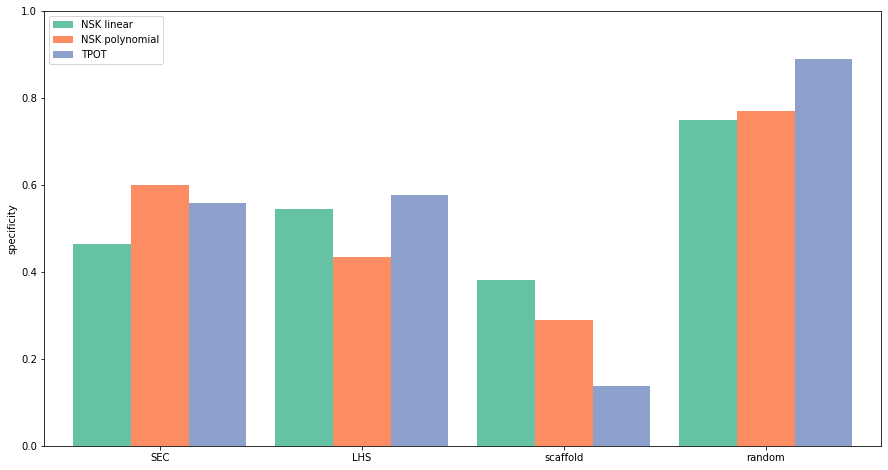

In [39]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='specificity')

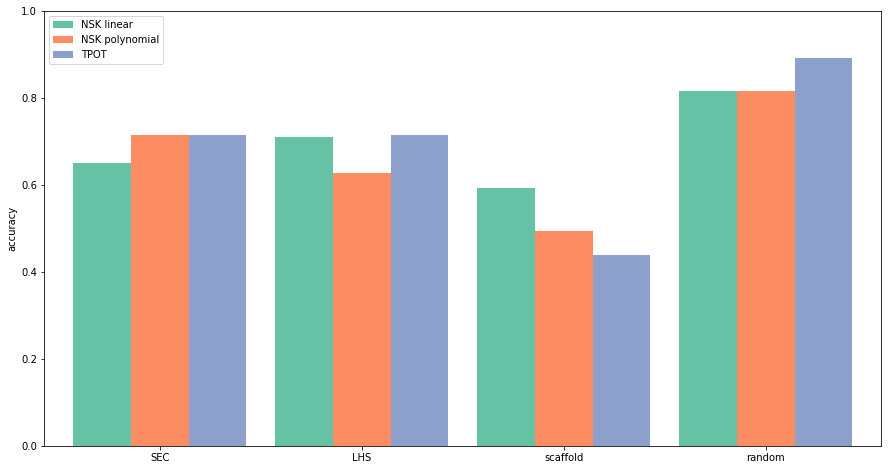

In [40]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='accuracy')

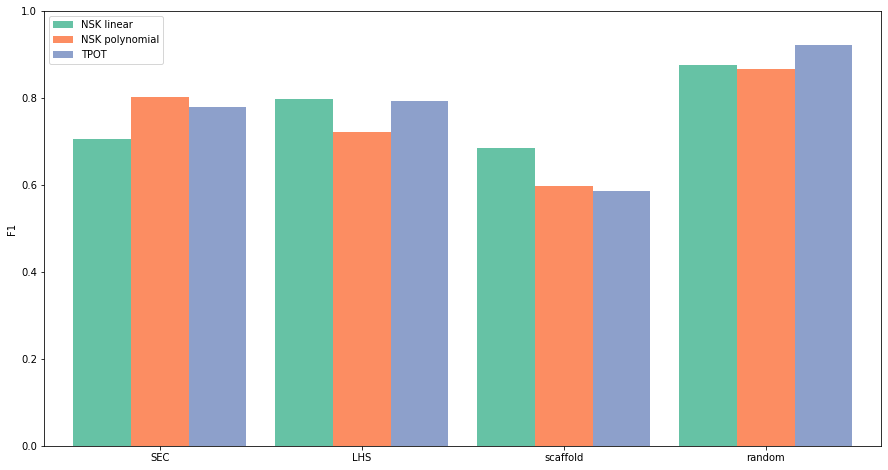

In [41]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='F1')

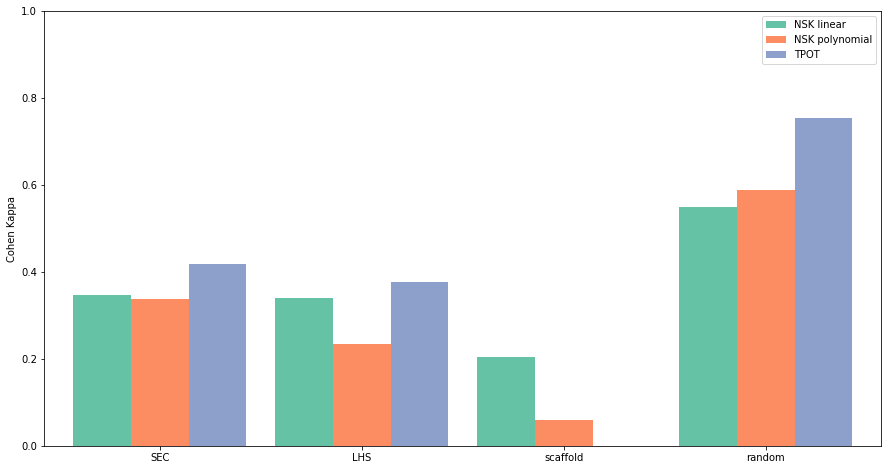

In [42]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='Cohen Kappa')

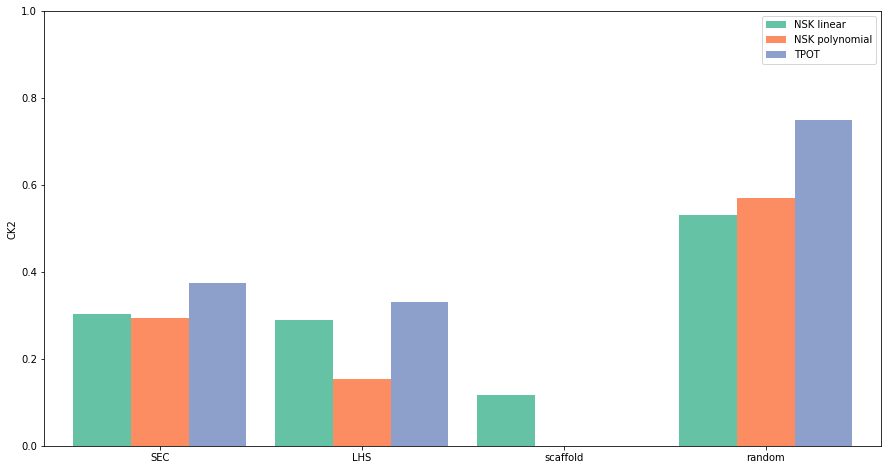

In [43]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='CK2')

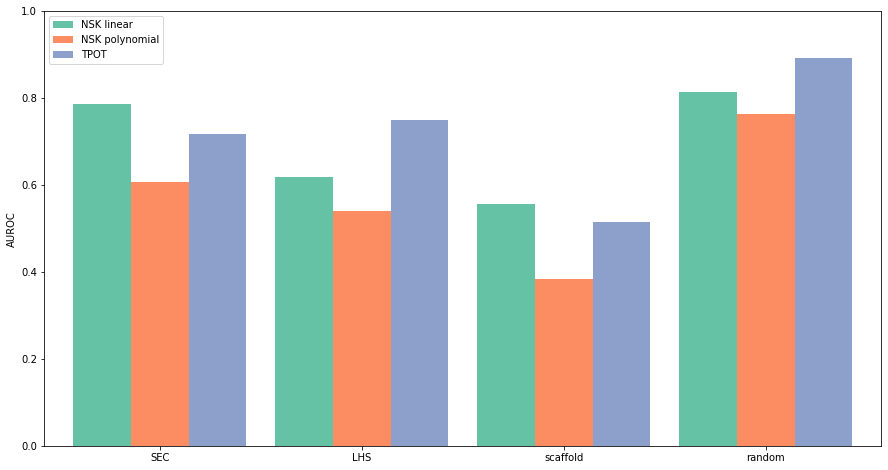

In [44]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='AUROC')

In [45]:
ext_results_raw['SEC']

,predicted,predicted labal,true label,fold,iteration,index,model,encoding
0,-0.854785,0,0,,,0,NSK_linear,MACCS
1,0.625161,1,0,,,1,NSK_linear,MACCS
2,0.237921,1,0,,,2,NSK_linear,MACCS
3,-1.543886,0,0,,,3,NSK_linear,MACCS
4,-1.264121,0,0,,,4,NSK_linear,MACCS
...,...,...,...,...,...,...,...,...
263,0.363750,0,1,,,86,TPOT,MACCS
264,0.984833,1,1,,,87,TPOT,MACCS
265,0.913000,1,1,,,88,TPOT,MACCS
266,1.000000,1,1,,,89,TPOT,MACCS


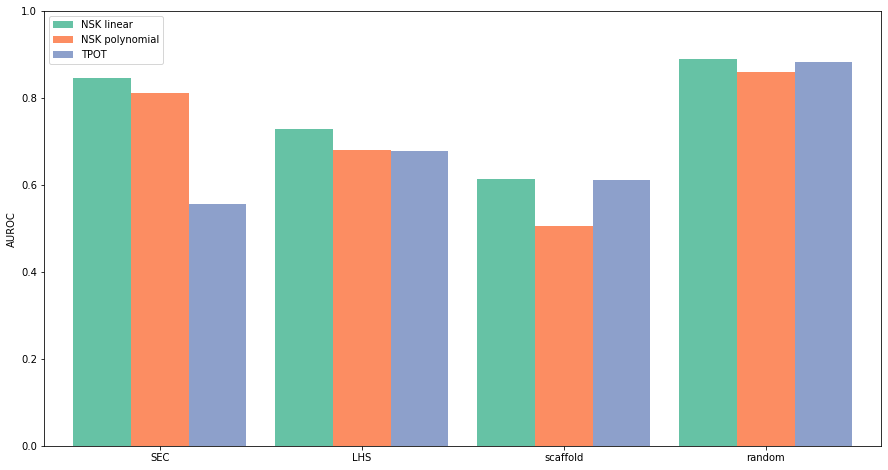

In [46]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='AUROC')

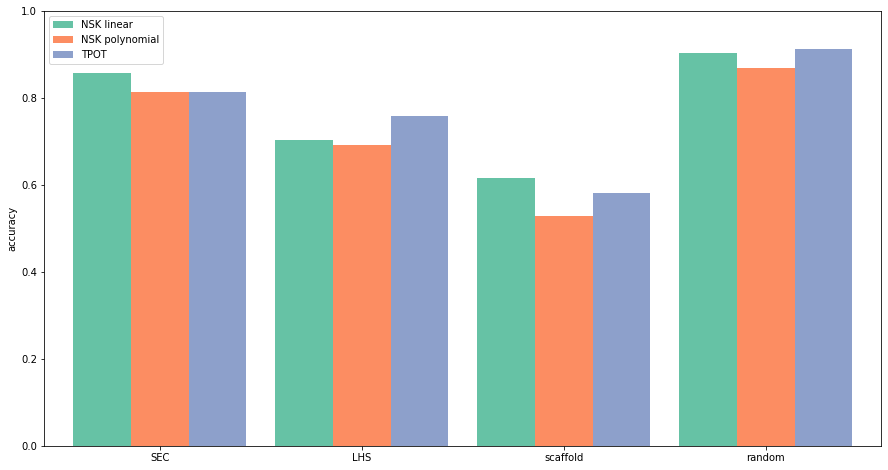

In [47]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='accuracy')

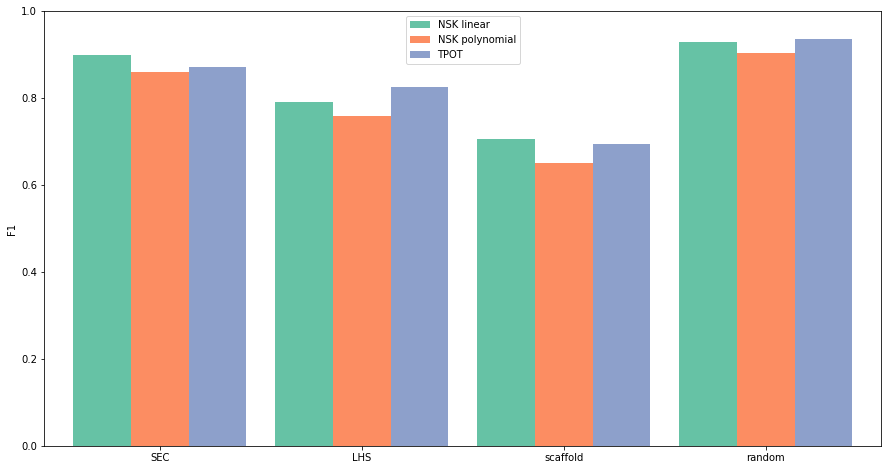

In [48]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='F1')

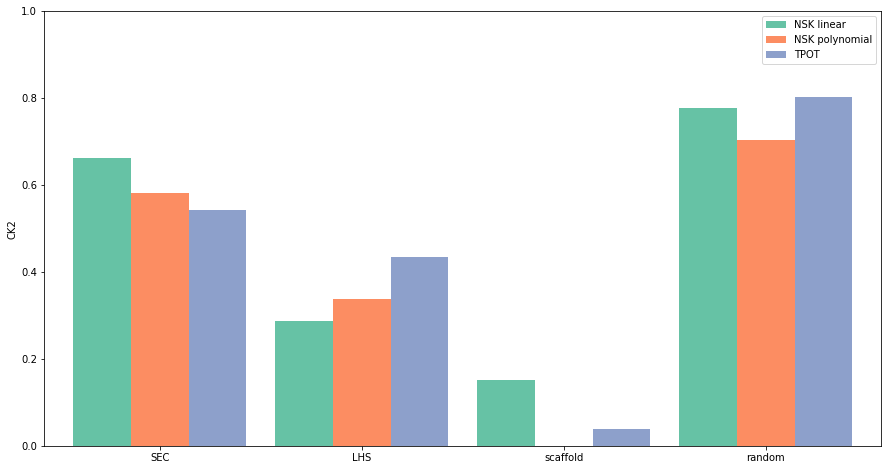

In [49]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='CK2')

Auroc

In [50]:
# sens,spec = data_analysis.AUROC_analysis( data_dict = ext_results_raw, 
#                 num_step=25,line_thickness=2)

In [51]:
# sens,spec = data_analysis.AUROC_analysis( data_dict = MORGAN_ext_results_raw, 
#                 num_step=25,line_thickness=2)

# Hansen Data analysis

In [52]:
hansen_raw = {
    'random':   pd.read_pickle('model_results/hansen/rscv_random_hansen_results.pk1')
}
hansen_macro_results={}; hansen_micro_results={}; hansen_results={}

for data in hansen_raw:
    hansen_results[data] = data_analysis.pickle_transform(hansen_raw[data])
    hansen_macro_results[data],hansen_micro_results[data] = data_analysis.macro_mirco_mean_stdv(hansen_results[data])
hansen_macro_results = data_analysis.get_AUROC(data_dict=hansen_raw, paste_dict=hansen_macro_results)
hansen_micro_results = data_analysis.get_AUROC(data_dict=hansen_raw, paste_dict=hansen_micro_results)

MACCS NSK linear is missing data
Morgan NSK linear is missing data
MACCS NSK polynomial is missing data
Morgan NSK polynomial is missing data


Bar Chart

In [53]:
hansen_macro_results['random']

,encoding,model,F1,F1_stdv,Cohen Kappa,Cohen Kappa_stdv,accuracy,accuracy_stdv,sensitivity,sensitivity_stdv,specificity,specificity_stdv,AUROC
0,MACCS,NSK linear,0.725704,0.021995,0.218448,0.021098,0.718061,0.021255,0.760309,0.021422,0.677784,0.023181,0.77654
1,Morgan,NSK linear,0.764906,0.012072,0.260016,0.011171,0.759385,0.011309,0.809631,0.012414,0.712612,0.013234,0.80651
2,MACCS,NSK polynomial,0.771323,0.028916,0.258187,0.029186,0.758816,0.029281,0.785967,0.027340,0.730054,0.032692,0.77108
3,Morgan,NSK polynomial,0.793869,0.013773,0.277599,0.013793,0.778785,0.013843,0.798872,0.012483,0.756127,0.017686,0.81922


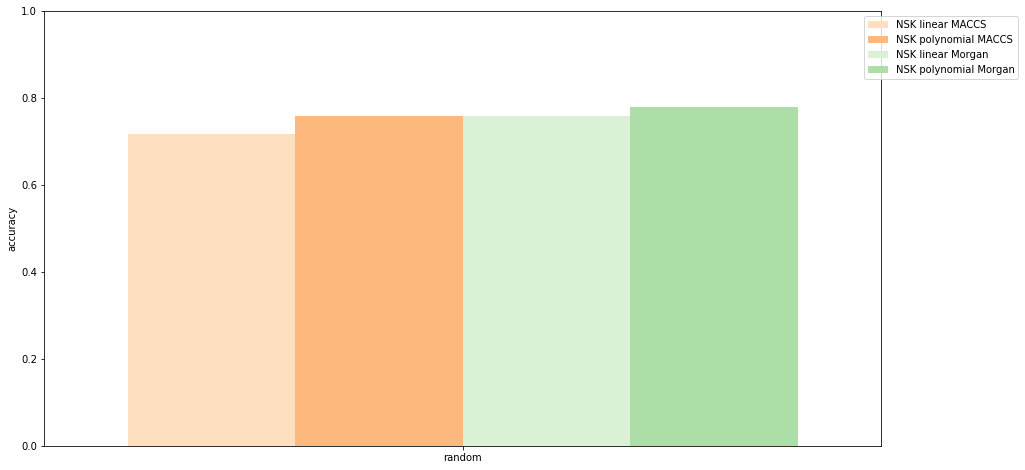

In [54]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='accuracy',grouping_size=2)

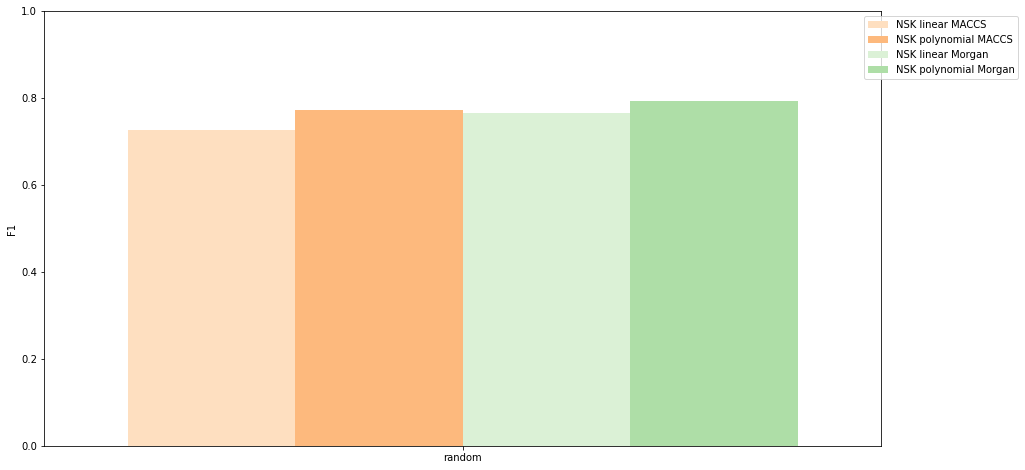

In [55]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='F1',grouping_size=2)

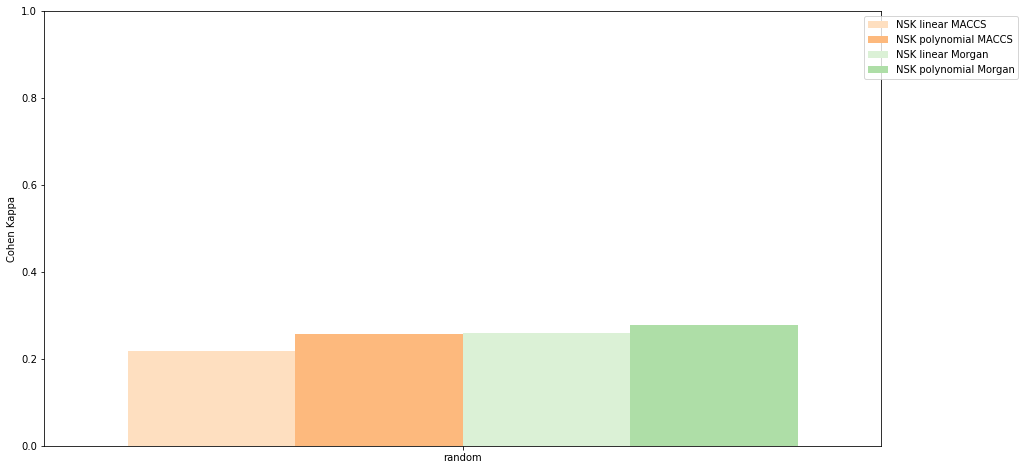

In [56]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='Cohen Kappa',grouping_size=2)

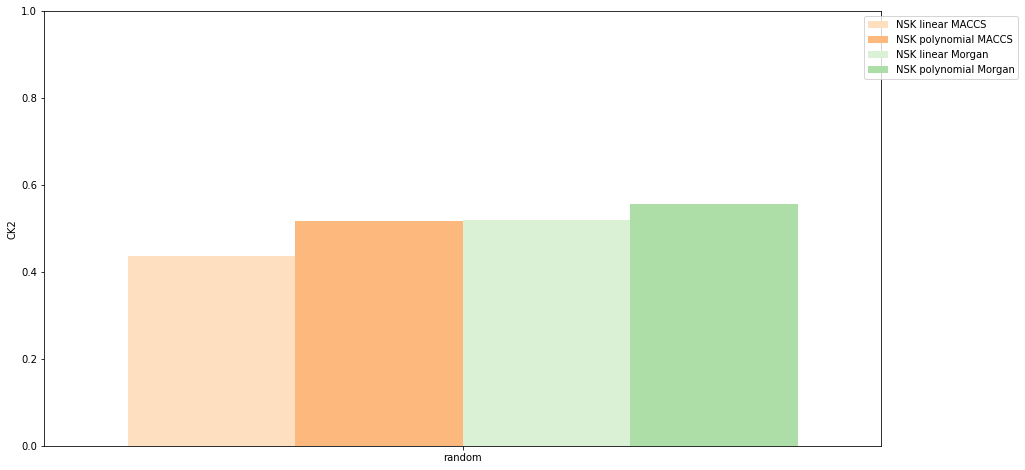

In [57]:
data_analysis.my_grouped_bar(hansen_micro_results,metric='CK2',grouping_size=2)

In [58]:
hansen_micro_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK linear,0.725859,0.475499,0.436884,0.718063,0.760175,0.677439,0.77654
1,Morgan,NSK linear,0.764976,0.547315,0.520025,0.759387,0.809508,0.712424,0.80651
2,MACCS,NSK polynomial,0.771449,0.545280,0.516305,0.758801,0.785990,0.729592,0.77108
3,Morgan,NSK polynomial,0.793938,0.579764,0.555186,0.778786,0.798827,0.755869,0.81922


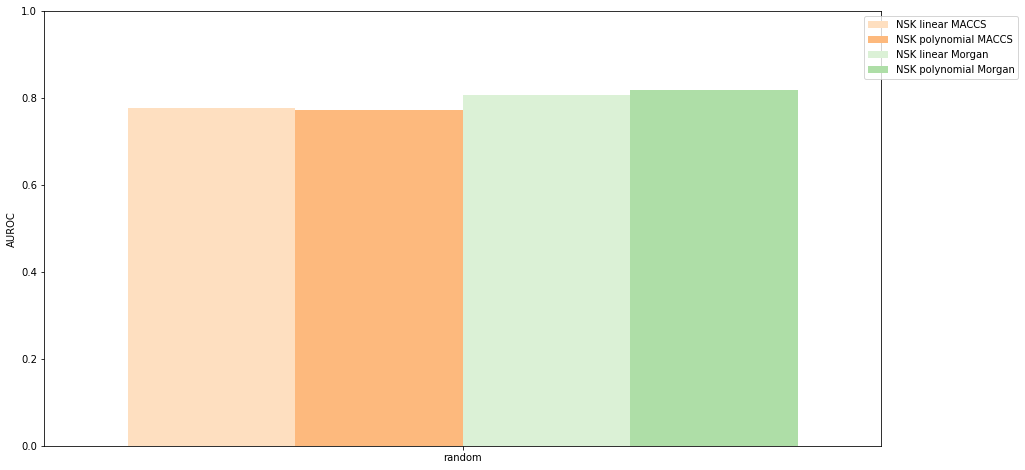

In [59]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='AUROC',grouping_size=2)